In [14]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Mohammad Hassan\AppData\Local\Programs\Python\Python38-32\python.exe -m pip install --upgrade pip' command.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Mohammad Hassan\\AppData\\Roaming\\Python\\Python38\\site-packages\\~andas\\_libs\\algos.cp38-win32.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\Users\Mohammad Hassan\AppData\Local\Programs\Python\Python38-32\python.exe -m pip install --upgrade pip' command.


  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)
  Using cached pandas-2.0.3-cp38-cp38-win32.whl (9.6 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3
['Action' 'Mystery & Thriller' 'Kids & Family' 'Fantasy' 'Adventure'
 'Documentary' 'Biography' 'Horror' 'Nature' 'Comedy' 'Romance' 'LGBTQ+'
 'Crime' 'Drama' 'Sci-Fi' 'History' 'Anime' 'Sports' 'Western' 'Animation'
 'War' 'Music' 'Musical' 'Holiday' 'Short' 'Stand-Up' 'News'
 'Sports & Fitness' 'Special Interest' 'Foreign' 'Variety' nan]
Documentary           2355
Drama                 2275
Comedy                1983
Horror                1250
Mystery & Thriller    1116
Action                 896
Romance                599
Kids & Family          524
Crime                  320
Sci-Fi                 307
Biography              242
History                194
Adventure 

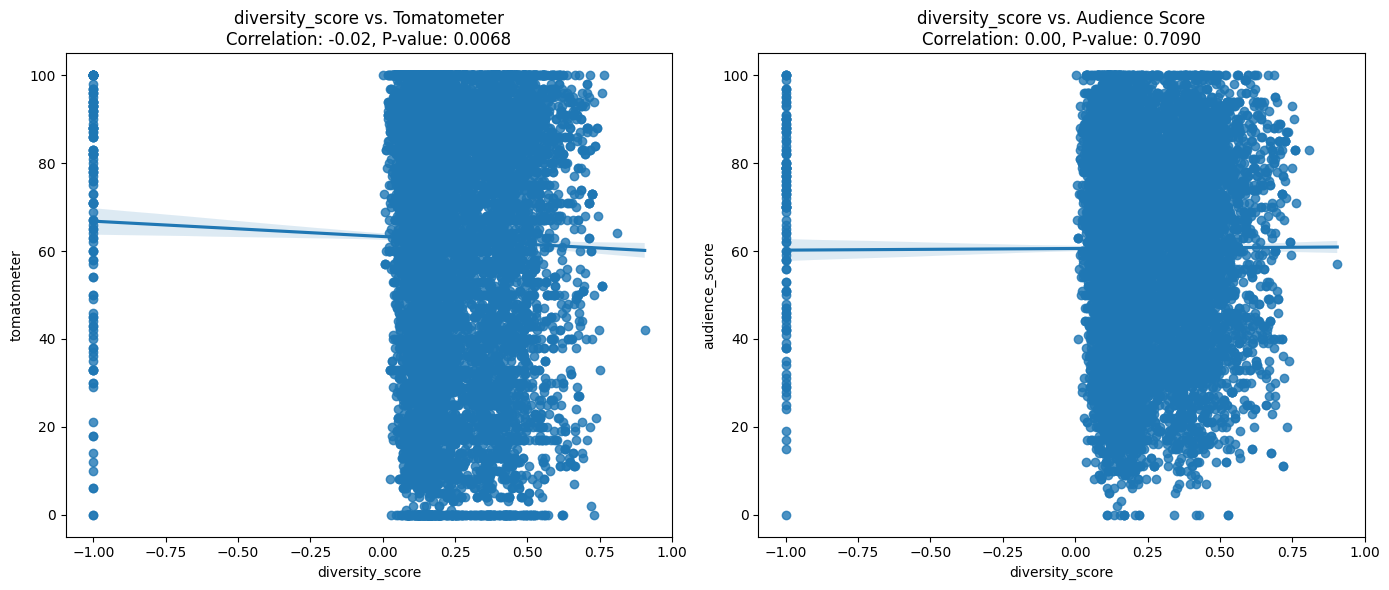

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: Load the data
df = pd.read_csv('Data/Final/diversity_movies.csv')

# Step 2: Preprocess the data
# For example, convert budget, domestic_revenue, international_revenue, and worldwide_revenue to numeric values
# df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
# df['domestic_revenue'] = pd.to_numeric(df['domestic_revenue'], errors='coerce')
# df['international_revenue'] = pd.to_numeric(df['international_revenue'], errors='coerce')
# df['worldwide_revenue'] = pd.to_numeric(df['worldwide_revenue'], errors='coerce')

# Step 3: Bin the movies
# You can define your own bins for genres and budget. For example:
genre_bins = df['genres'].apply(lambda x: eval(x)).explode().unique()  # Adjust this as per actual genre column
budget_bins = [0, 10000000, 50000000, 100000000, 500000000]  # Define budget bins as you see fit

# Create a new column for genre bins - here's an example of how you might bin by the first genre listed
df['genre_bin'] = df['genres'].apply(lambda x: x[2:-2].split("', '")[0])  # Simplistic approach, adjust as needed

# Create a new column for budget bins
# df['budget_bin'] = pd.cut(df['budget'], budget_bins, labels=['Low', 'Medium', 'High', 'Blockbuster'])

# Define the edges of your bins, starting from the earliest decade you want to include
bin_edges = [year for year in range(1980, 2030, 10)]

# Create labels for your bins
bin_labels = [f"{year}s" for year in range(1990, 2030, 10)]

# Use pd.cut to create decade bins
df['decade'] = pd.cut(df['year'], bins=bin_edges, labels=bin_labels, right=False)


#Step 4: Calculate metrics


# Step 4: Calculate profits
# Filter out rows where either worldwide_revenue or budget is zero
# df = df.loc[(df['worldwide_revenue'] > 0) & (df['budget'] > 0)]

# # Calculate profit
# df['profit'] = df['worldwide_revenue'] - df['budget']

#print all the bins
print(genre_bins)
#print number of entries in each genre bin
print(df['genre_bin'].value_counts())
# print(budget_bins)
# print(df['budget_bin'].value_counts())

#print year bins
print(df['decade'].value_counts())


# Step 5: Analyze the results
# Print some basic stats about the dataset
print(df.describe())

# Step 5: Analyze the relationship between cast diversity and success metrics
# You would need to quantify cast diversity first, then you could use correlation analysis for example.



# Sample data creation (replace this with your actual dataframe)
# df = pd.read_csv('your_dataset.csv')

# Calculate correlations and p-values
corr_coefficient_tomatometer, p_value_tomatometer = stats.pearsonr(df['diversity_score'], df['tomatometer'])
corr_coefficient_audience, p_value_audience = stats.pearsonr(df['diversity_score'], df['audience_score'])

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# 1st subplot for Profit vs. Tomatometer
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.regplot(x='diversity_score', y='tomatometer', data=df)
plt.title(f'diversity_score vs. Tomatometer\nCorrelation: {corr_coefficient_tomatometer:.2f}, P-value: {p_value_tomatometer:.4f}')

# 2nd subplot for Profit vs. Audience Score
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.regplot(x='diversity_score', y='audience_score', data=df)
plt.title(f'diversity_score vs. Audience Score\nCorrelation: {corr_coefficient_audience:.2f}, P-value: {p_value_audience:.4f}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#Do the same analysis wiht the different bins

# Group by budget bin and calculate correlation within each bin
# for budget_label in df['budget_bin'].cat.categories:
#     group = df[df['budget_bin'] == budget_label]
   
#     corr_coefficient_tomatometer, p_value_tomatometer = stats.pearsonr(group['profit'], group['tomatometer'])
#     corr_coefficient_audience, p_value_audience = stats.pearsonr(group['profit'], group['audience_score'])
   
#     print(f"{budget_label} Bin - Profit vs. Tomatometer: Correlation: {corr_coefficient_tomatometer:.2f}, P-value: {p_value_tomatometer:.4f}")
#     print(f"{budget_label} Bin - Profit vs. Audience Score: Correlation: {corr_coefficient_audience:.2f}, P-value: {p_value_audience:.4f}")

# Set up the matplotlib figure
# fig, axes = plt.subplots(nrows=len(budget_bins) - 1, ncols=2, figsize=(8, 2 * (len(budget_bins) - 1)))

# for i, budget_label in enumerate(df['budget_bin'].cat.categories):
#     group = df[df['budget_bin'] == budget_label]
   
#     # 1st column of subplots for Profit vs. Tomatometer
#     sns.regplot(ax=axes[i, 0], x='profit', y='tomatometer', data=group)
#     axes[i, 0].set_title(f'{budget_label} Bin - Profit vs. Tomatometer')
   
#     # 2nd column of subplots for Profit vs. Audience Score
#     sns.regplot(ax=axes[i, 1], x='profit', y='audience_score', data=group)
#     axes[i, 1].set_title(f'{budget_label} Bin - Profit vs. Audience Score')

# # Adjust layout to prevent overlap
# plt.tight_layout()

# Show the plot
#plt.show()

# Group by year bin and calculate correlation within each bin
# for year_label in df['decade'].cat.categories:
#     group = df[df['decade'] == year_label]
   
#     corr_coefficient_tomatometer, p_value_tomatometer = stats.pearsonr(group['profit'], group['tomatometer'])
#     corr_coefficient_audience, p_value_audience = stats.pearsonr(group['profit'], group['audience_score'])
   
#     print(f"{year_label} Bin - Profit vs. Tomatometer: Correlation: {corr_coefficient_tomatometer:.2f}, P-value: {p_value_tomatometer:.4f}")
#     print(f"{year_label} Bin - Profit vs. Audience Score: Correlation: {corr_coefficient_audience:.2f}, P-value: {p_value_audience:.4f}")


# # Set up the matplotlib figure
# fig, axes = plt.subplots(nrows=len(bin_labels), ncols=2, figsize=(14, 6 * len(bin_labels)))
# for i, label in enumerate(bin_labels):
#     group = df[df['decade'] == label]
#     # 1st column of subplots for Profit vs. Tomatometer
#     sns.regplot(ax=axes[i, 0], x='profit', y='tomatometer', data=group)
#     axes[i, 0].set_title(f'{label} Bin - Profit vs. Tomatometer')
#     # 2nd column of subplots for Profit vs. Audience Score
#     sns.regplot(ax=axes[i, 1], x='profit', y='audience_score', data=group)
#     axes[i, 1].set_title(f'{label} Bin - Profit vs. Audience Score')
# # Adjust layout to prevent overlap
# plt.tight_layout()
# Show the plot
# plt.show()

c:\Users\Mohammad Hassan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Mohammad Hassan\AppData\Local\Temp\ipykernel_16472\1413228361.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(correlation_df['Genre'], rotation=45, ha='right')
C:\Users\Mohammad Hassan\AppData\Local\Temp\ipykernel_16472\1413228361.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(correlation_df['Genre'], rotation=45, ha='right')


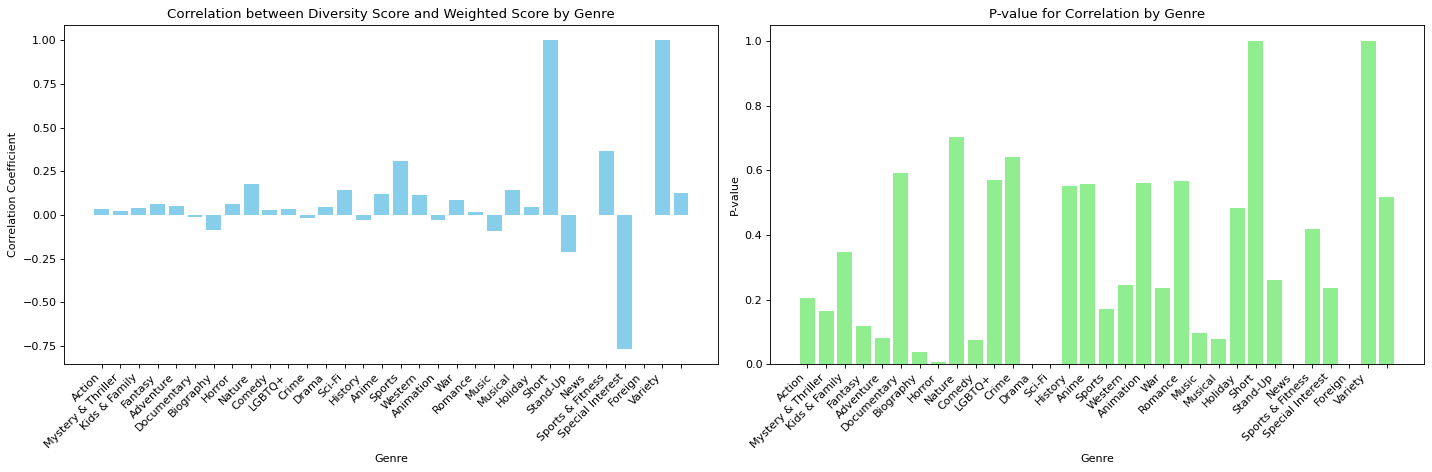

In [10]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Read data from CSV file
df = pd.read_csv('Data/Final/diversity_movies.csv')  # Replace with your CSV file path

# Define a function to extract genres from the string representation of a list
def extract_genres(genres_str):
    # Remove the brackets and split by ','
    genres = genres_str.strip("[]").replace("'", "").split(", ")
    return genres

# Apply the function to genres column to create a list of genres
df['genres_list'] = df['genres'].apply(extract_genres)

# Explode the DataFrame on the genre list to have a row for each genre per movie
genre_bins = df.explode('genres_list')

# Initialize a dictionary to store the correlation and p-values
genre_correlation = {}

# Calculate the correlation coefficients and p-values for each genre
for genre in genre_bins['genres_list'].unique():
    genre_group = genre_bins[genre_bins['genres_list'] == genre]
    if len(genre_group) > 1:  # We need at least two data points to calculate correlation
        corr, p_val = stats.pearsonr(genre_group['diversity_score'], genre_group['weighted_score'])
        genre_correlation[genre] = {
            'correlation': corr,
            'p_value': p_val
        }
    else:
        # If there's only one movie in the genre, we can't calculate correlation
        genre_correlation[genre] = {
            'correlation': np.nan,
            'p_value': np.nan
        }

# Convert the results to a DataFrame
correlation_df = pd.DataFrame.from_dict(genre_correlation, orient='index').reset_index().rename(columns={'index': 'Genre'})

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), dpi=80)

# Correlation plot
axes[0].bar(correlation_df['Genre'], correlation_df['correlation'], color='skyblue')
axes[0].set_title('Correlation between Diversity Score and Weighted Score by Genre')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Correlation Coefficient')
axes[0].set_xticklabels(correlation_df['Genre'], rotation=45, ha='right')

# P-value plot
axes[1].bar(correlation_df['Genre'], correlation_df['p_value'], color='lightgreen')
axes[1].set_title('P-value for Correlation by Genre')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('P-value')
axes[1].set_xticklabels(correlation_df['Genre'], rotation=45, ha='right')

# Show the plots
plt.tight_layout()
plt.show()


C:\Users\Mohammad Hassan\AppData\Local\Temp\ipykernel_16472\3466805037.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['diversity_score'], ax=axes[0])


ModuleNotFoundError: No module named 'pandas.core.computation.expressions'

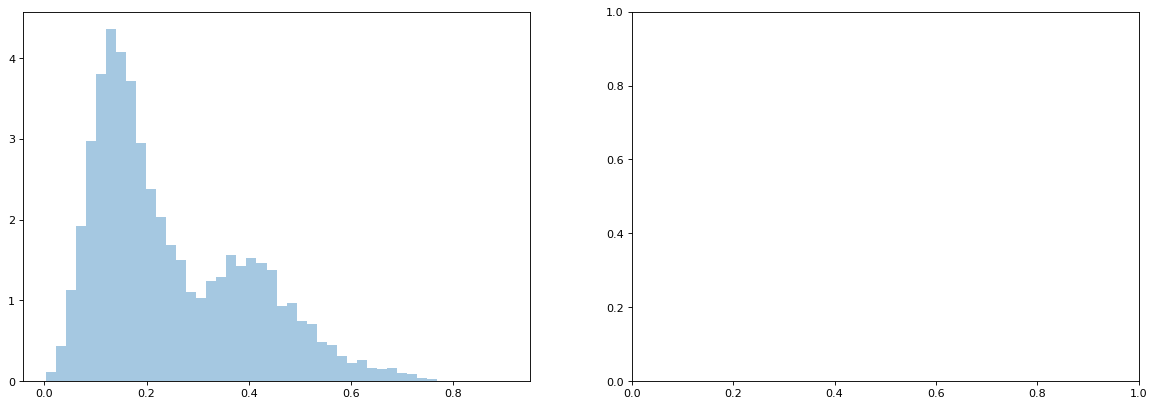

In [20]:
# plot a distribution of the diversity scores
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), dpi=80)

# Distribution plot
sns.distplot(df['diversity_score'], ax=axes[0])
axes[0].set_title('Distribution of Diversity Scores')
axes[0].set_xlabel('Diversity Score')
axes[0].set_ylabel('Frequency')


# Show the plots
plt.tight_layout()
plt.show()

# plot a distribution of the weighted scores
# Set up the matplotlib figure


C:\Users\Mohammad Hassan\AppData\Local\Temp\ipykernel_16472\3979005488.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['diversity_score'], ax=axes[0])


ModuleNotFoundError: No module named 'pandas.core.computation.expressions'

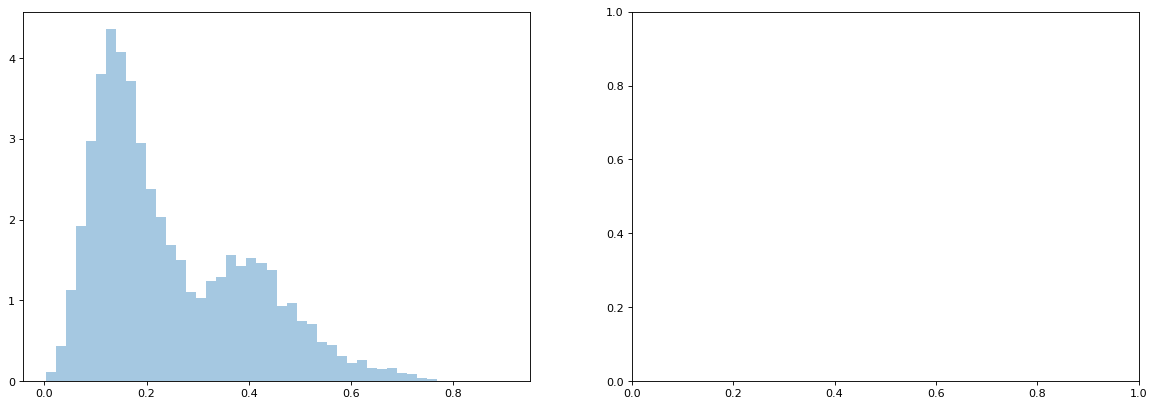

In [24]:
# plot the distribution of diversity scores by genre
# Set up the matplotlib figure
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), dpi=80)

# # Distribution plot
# sns.boxplot(x='genres_list', y='diversity_score', data=genre_bins, ax=axes[0])
# axes[0].set_title('Distribution of Diversity Scores by Genre')
# axes[0].set_xlabel('Genre')
# axes[0].set_ylabel('Diversity Score')
# axes[0].set_xticklabels(correlation_df['Genre'], rotation=45, ha='right')

# # Show the plots
# plt.tight_layout()
# plt.show()

# # plot the distribution of weighted scores by genre
# # Set up the matplotlib figure
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), dpi=80)

# # Distribution plot
# sns.boxplot(x='genres_list', y='weighted_score', data=genre_bins, ax=axes[0])
# axes[0].set_title('Distribution of Weighted Scores by Genre')
# axes[0].set_xlabel('Genre')
# axes[0].set_ylabel('Weighted Score')
# axes[0].set_xticklabels(correlation_df['Genre'], rotation=45, ha='right')

# # Show the plots
# plt.tight_layout()
# plt.show()

# show the 50th percentile of diversity scores
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), dpi=80)

# Distribution plot
sns.distplot(df['diversity_score'], ax=axes[0])
axes[0].set_title('Distribution of Diversity Scores')
axes[0].set_xlabel('Diversity Score')
axes[0].set_ylabel('Frequency')

# Add a vertical line at the 50th percentile
axes[0].axvline(df['diversity_score'].quantile(0.5), color='red', linestyle='--')

# Show the plots
plt.tight_layout()
plt.show()

